## **Task 3** - Distribution of goods by category

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
df.isna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Viewing unique values**

In [29]:
unique_categories = df['Category'].value_counts()
unique_categories

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

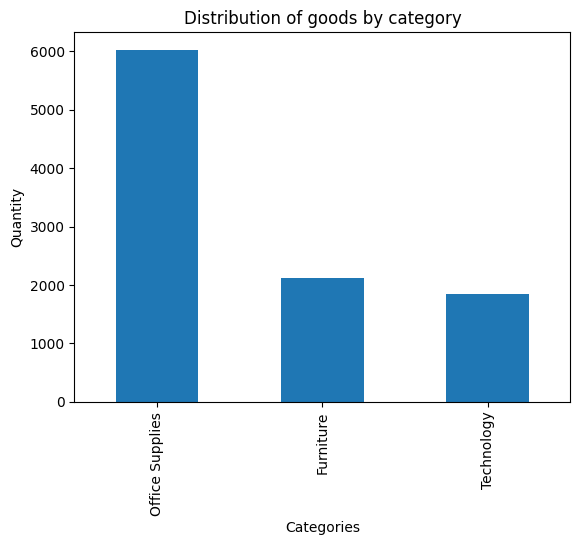

In [30]:
# Assume that 'Category' is one of the categorical variables
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of goods by category')
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.show()

In [31]:
# For example, let's look at the most common combinations of categories
category_combinations = df.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')
print(category_combinations)


           Category Sub-Category  Count
0         Furniture    Bookcases    228
1         Furniture       Chairs    617
2         Furniture  Furnishings    957
3         Furniture       Tables    319
4   Office Supplies   Appliances    466
5   Office Supplies          Art    796
6   Office Supplies      Binders   1523
7   Office Supplies    Envelopes    254
8   Office Supplies    Fasteners    217
9   Office Supplies       Labels    364
10  Office Supplies        Paper   1370
11  Office Supplies      Storage    846
12  Office Supplies     Supplies    190
13       Technology  Accessories    775
14       Technology      Copiers     68
15       Technology     Machines    115
16       Technology       Phones    889


In [32]:
# Example: Average sales by Category
avg_sales_profit_category = df.groupby('Category')[['Sales', 'Profit']].mean().reset_index()
print(avg_sales_profit_category)

          Category       Sales     Profit
0        Furniture  349.834887   8.699327
1  Office Supplies  119.324101  20.327050
2       Technology  452.709276  78.752002


In [33]:
uniqueCategories = pd.unique(df['Category'])
uniqueCategories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

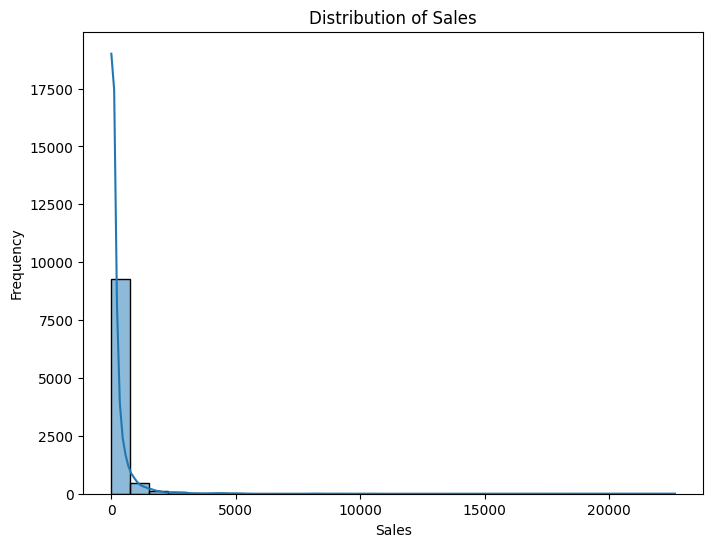

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

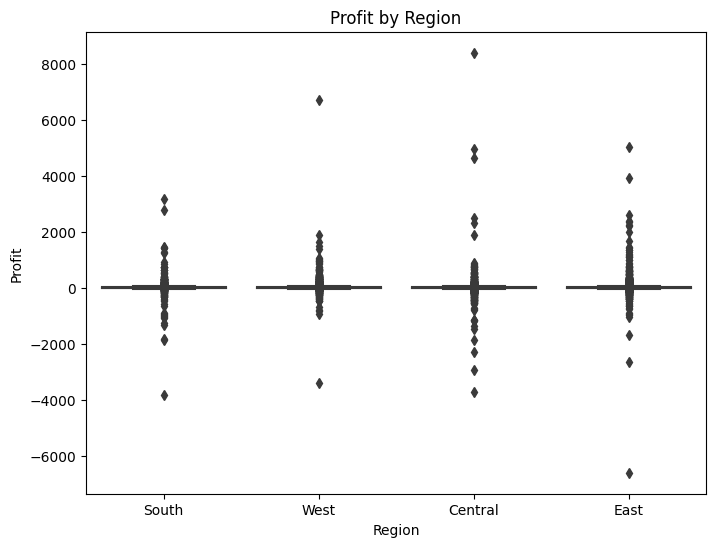

In [35]:
# Example: Boxplot of Profit by Region
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Region'], y=df['Profit'], palette="Blues")
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

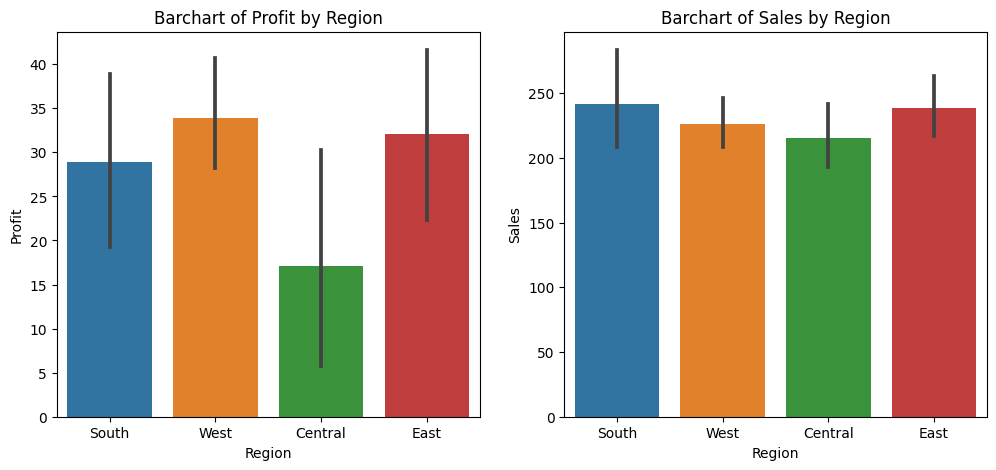

In [36]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot of Profit by Region
sns.barplot(x='Region', y='Profit', data=df, ax=axes[0])
axes[0].set_title('Barchart of Profit by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Profit')

# Plot of Sales by Region
sns.barplot(x='Region', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Barchart of Sales by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Sales')

plt.show()

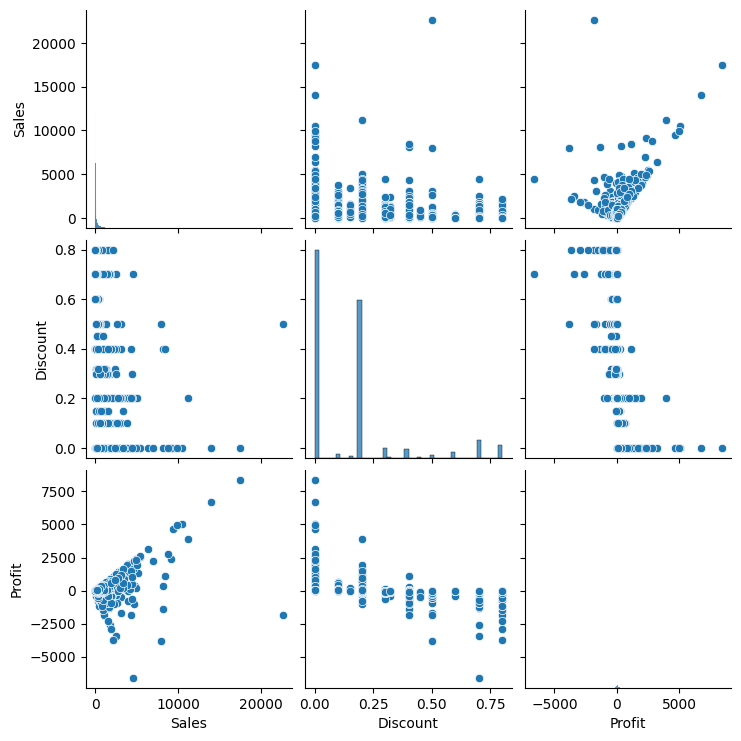

In [37]:
## Relationship between discounts, sales and profits
sns.pairplot(df, vars=['Sales', 'Discount', 'Profit'])
plt.show()

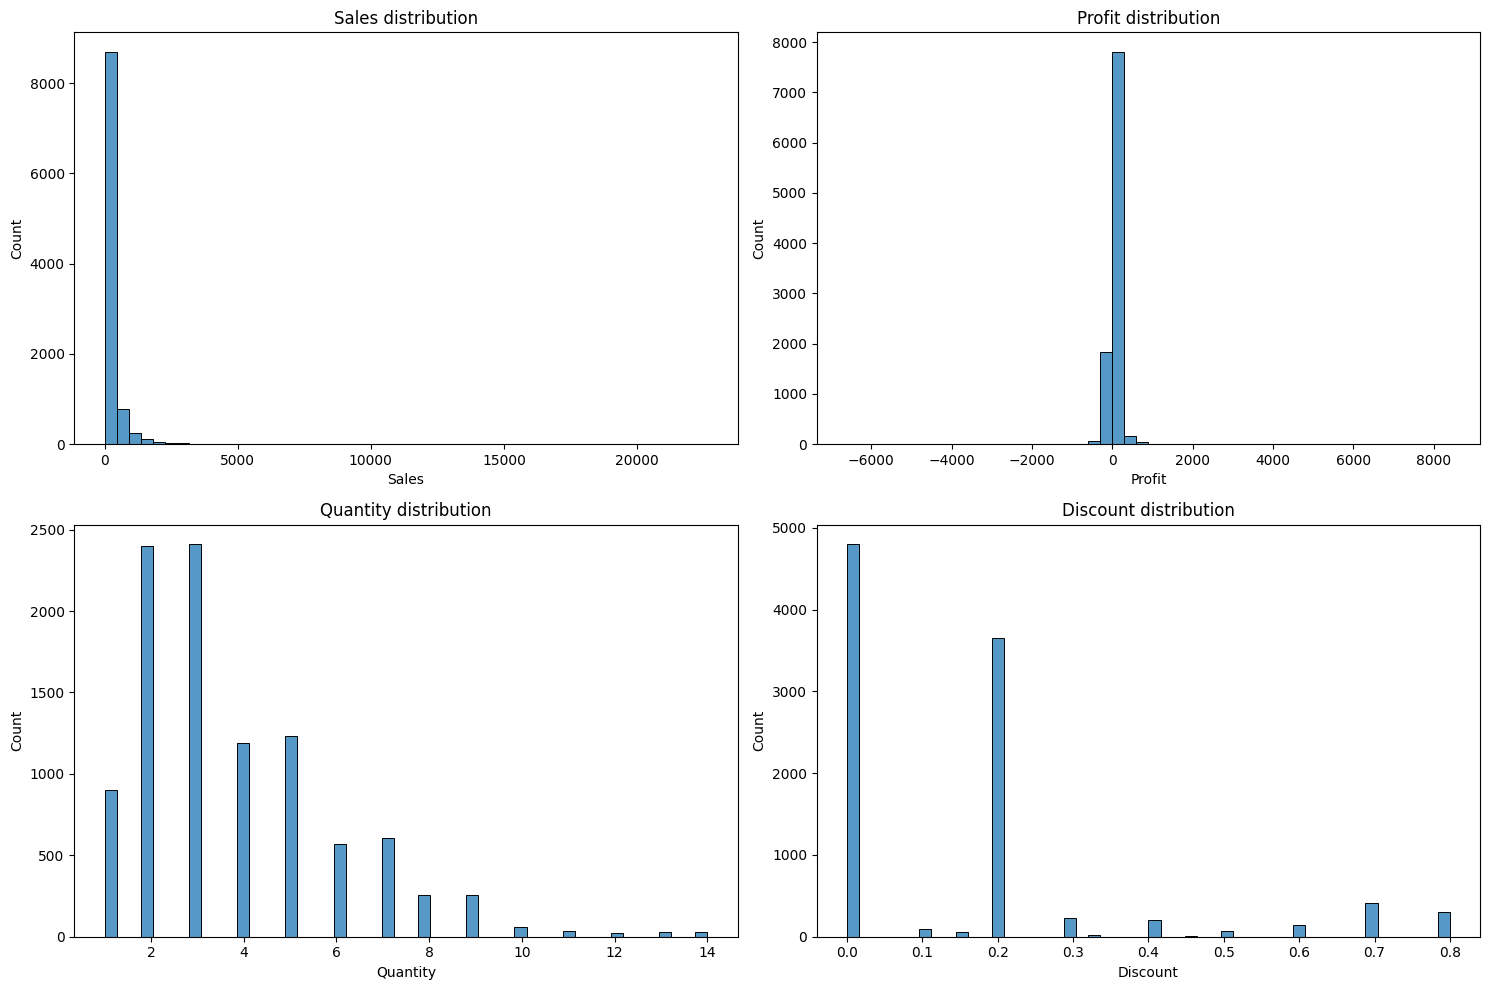

In [38]:
## Univariate analysis

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Sales'], bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Sales distribution')

sns.histplot(df['Profit'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Profit distribution')

sns.histplot(df['Quantity'], bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Quantity distribution')

sns.histplot(df['Discount'], bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Discount distribution')

plt.tight_layout()

### There appears to be a general trend where an increase in discount leads to a decrease in profit. This suggests a negative correlation between the two variables

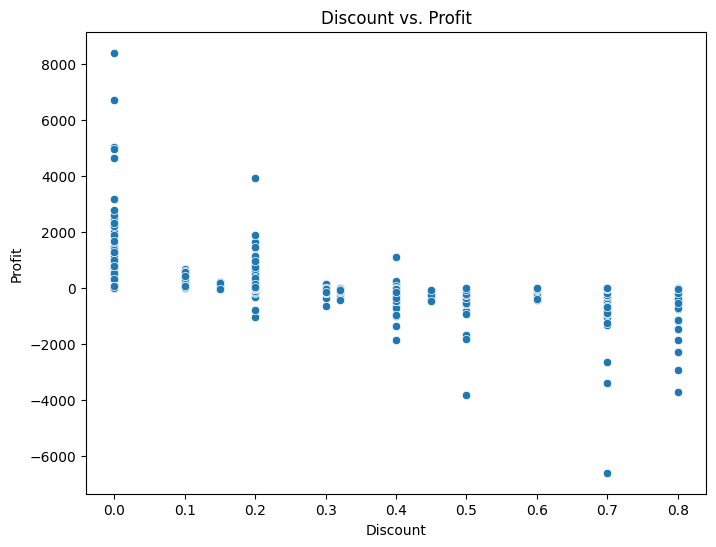

In [39]:
# Example: Scatter plot of Discount vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

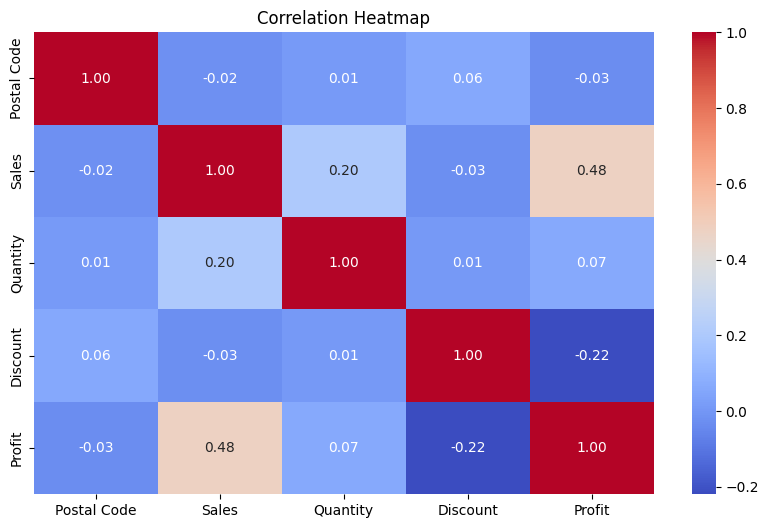

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
